<a href="https://colab.research.google.com/github/charliepinilla777/challenge-alura-latam-data-science/blob/main/AluraStoreLatam_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Cargando datos de las tiendas...

Primeras filas de Tienda 1:
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito     

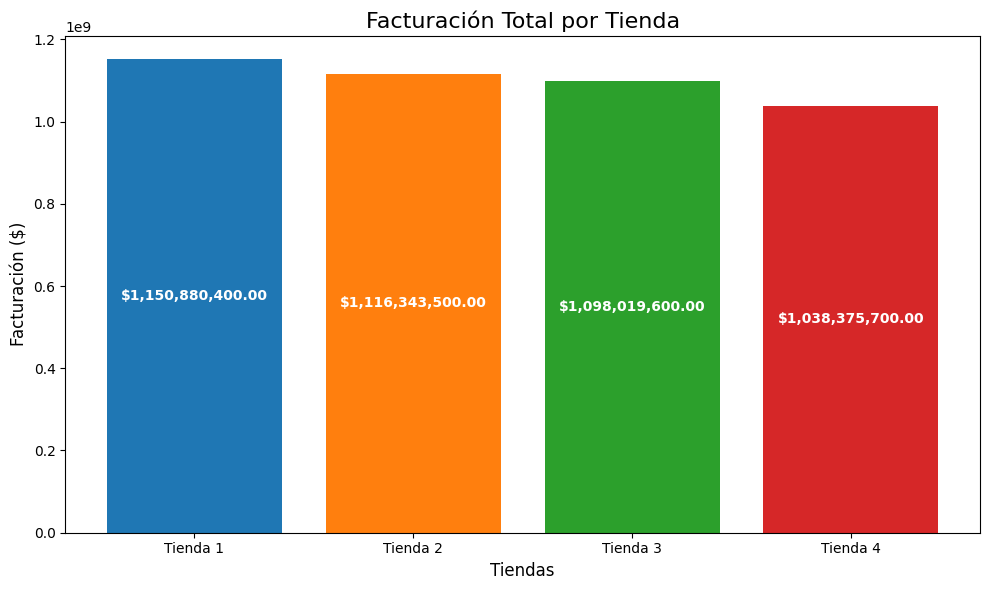

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carga de datos
print("Cargando datos de las tiendas...")
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

tienda, tienda2, tienda3, tienda4 = [pd.read_csv(url) for url in urls]
tiendas_df = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

print("\nPrimeras filas de Tienda 1:")
print(tienda.head())
print("\nColumnas disponibles:", tienda.columns.tolist())

# 2. Análisis de facturación
print("\n=== FACTURACIÓN POR TIENDA ===")
suma_de_precios_por_tienda = [round(df["Precio"].sum(), 2) for df in tiendas_df]
resultados_facturacion = list(zip(nombres_tiendas, suma_de_precios_por_tienda))

print("\nResultados de facturación:")
for tienda, total in resultados_facturacion:
    print(f"{tienda}: ${total:,.2f}")

plt.figure(figsize=(10, 6))
bars = plt.bar(nombres_tiendas, suma_de_precios_por_tienda, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title("Facturación Total por Tienda", fontsize=16)
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Facturación ($)", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f"${height:,.2f}",
             ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()



# 2. Ventas por categoría


=== VENTAS POR CATEGORÍA ===

Ventas por categoría en Tienda 1:
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: count, dtype: int64


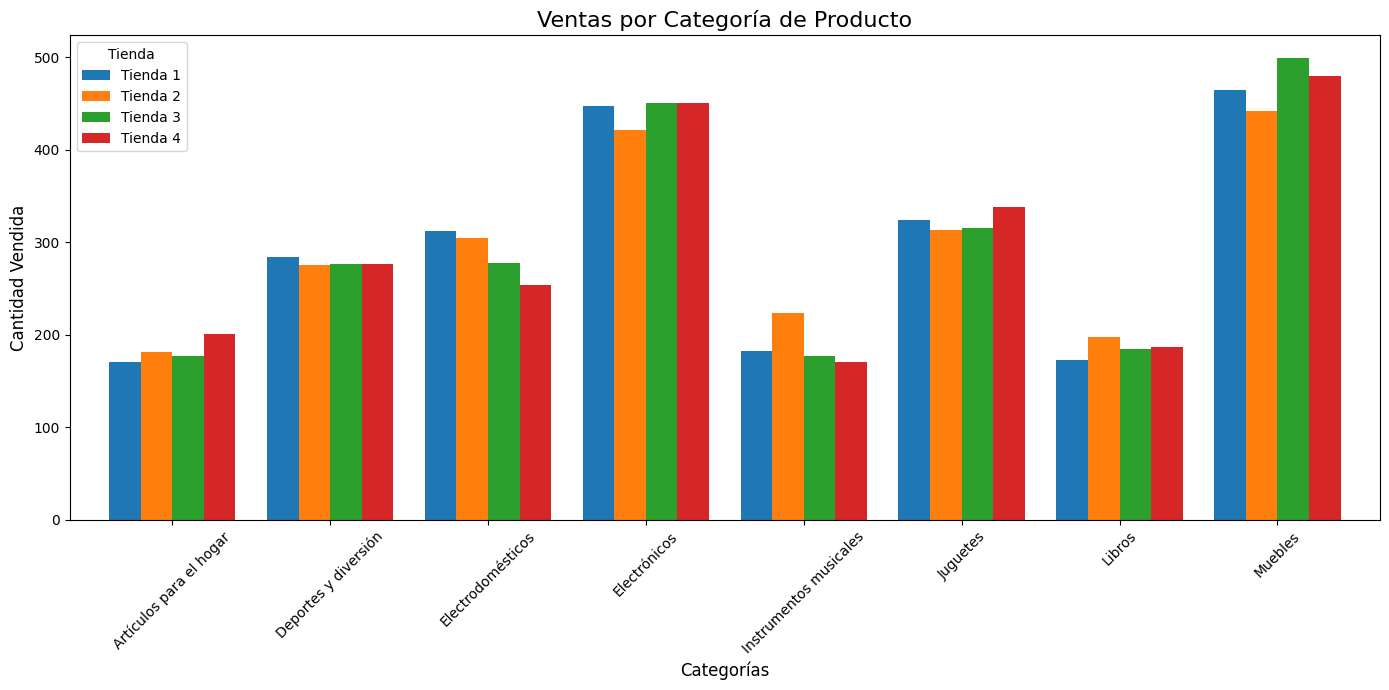

In [5]:
# 3. Ventas por categoría
print("\n=== VENTAS POR CATEGORÍA ===")
ventas_por_categoria = {nombre: df["Categoría del Producto"].value_counts()
                       for nombre, df in zip(nombres_tiendas, tiendas_df)}

print("\nVentas por categoría en Tienda 1:")
print(ventas_por_categoria["Tienda 1"].head())

df_categorias = pd.DataFrame(ventas_por_categoria)
df_categorias.plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title("Ventas por Categoría de Producto", fontsize=16)
plt.ylabel("Cantidad Vendida", fontsize=12)
plt.xlabel("Categorías", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda



=== CALIFICACIONES PROMEDIO ===

Calificaciones promedio:
Tienda 1: 3.98/5
Tienda 2: 4.04/5
Tienda 3: 4.05/5
Tienda 4: 4.0/5


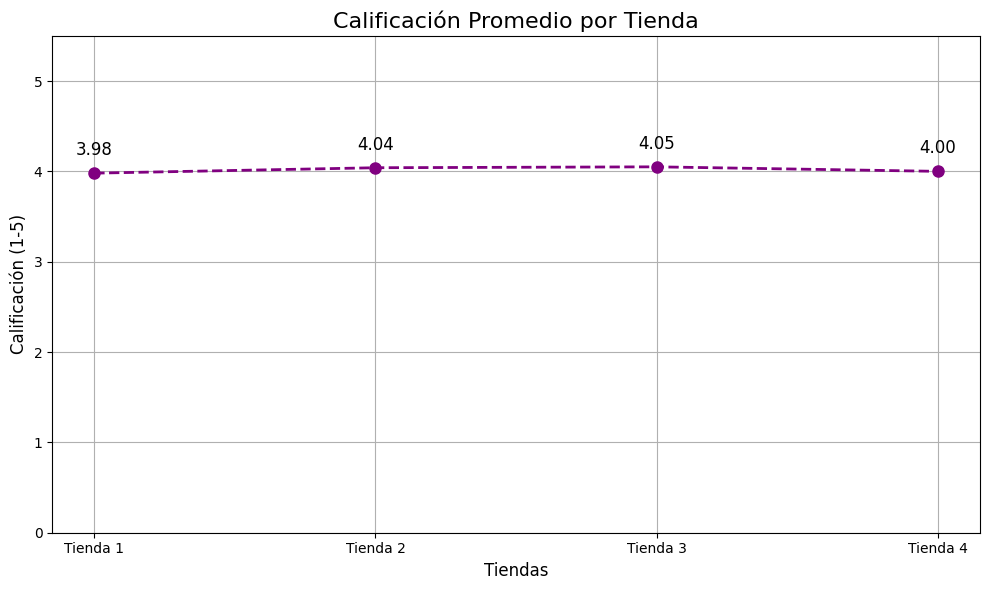

In [6]:
# . Calificación promedio
print("\n=== CALIFICACIONES PROMEDIO ===")
calificaciones_promedio = [round(df["Calificación"].mean(), 2) for df in tiendas_df]
resultados_calificaciones = list(zip(nombres_tiendas, calificaciones_promedio))

print("\nCalificaciones promedio:")
for tienda, calif in resultados_calificaciones:
    print(f"{tienda}: {calif}/5")

plt.figure(figsize=(10, 6))
plt.plot(nombres_tiendas, calificaciones_promedio, marker='o', markersize=8,
         linestyle='--', linewidth=2, color='purple')
plt.title("Calificación Promedio por Tienda", fontsize=16)
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Calificación (1-5)", fontsize=12)
plt.ylim(0, 5.5)

for i, val in enumerate(calificaciones_promedio):
    plt.text(i, val + 0.2, f"{val:.2f}", ha='center', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos


=== PRODUCTOS DESTACADOS ===


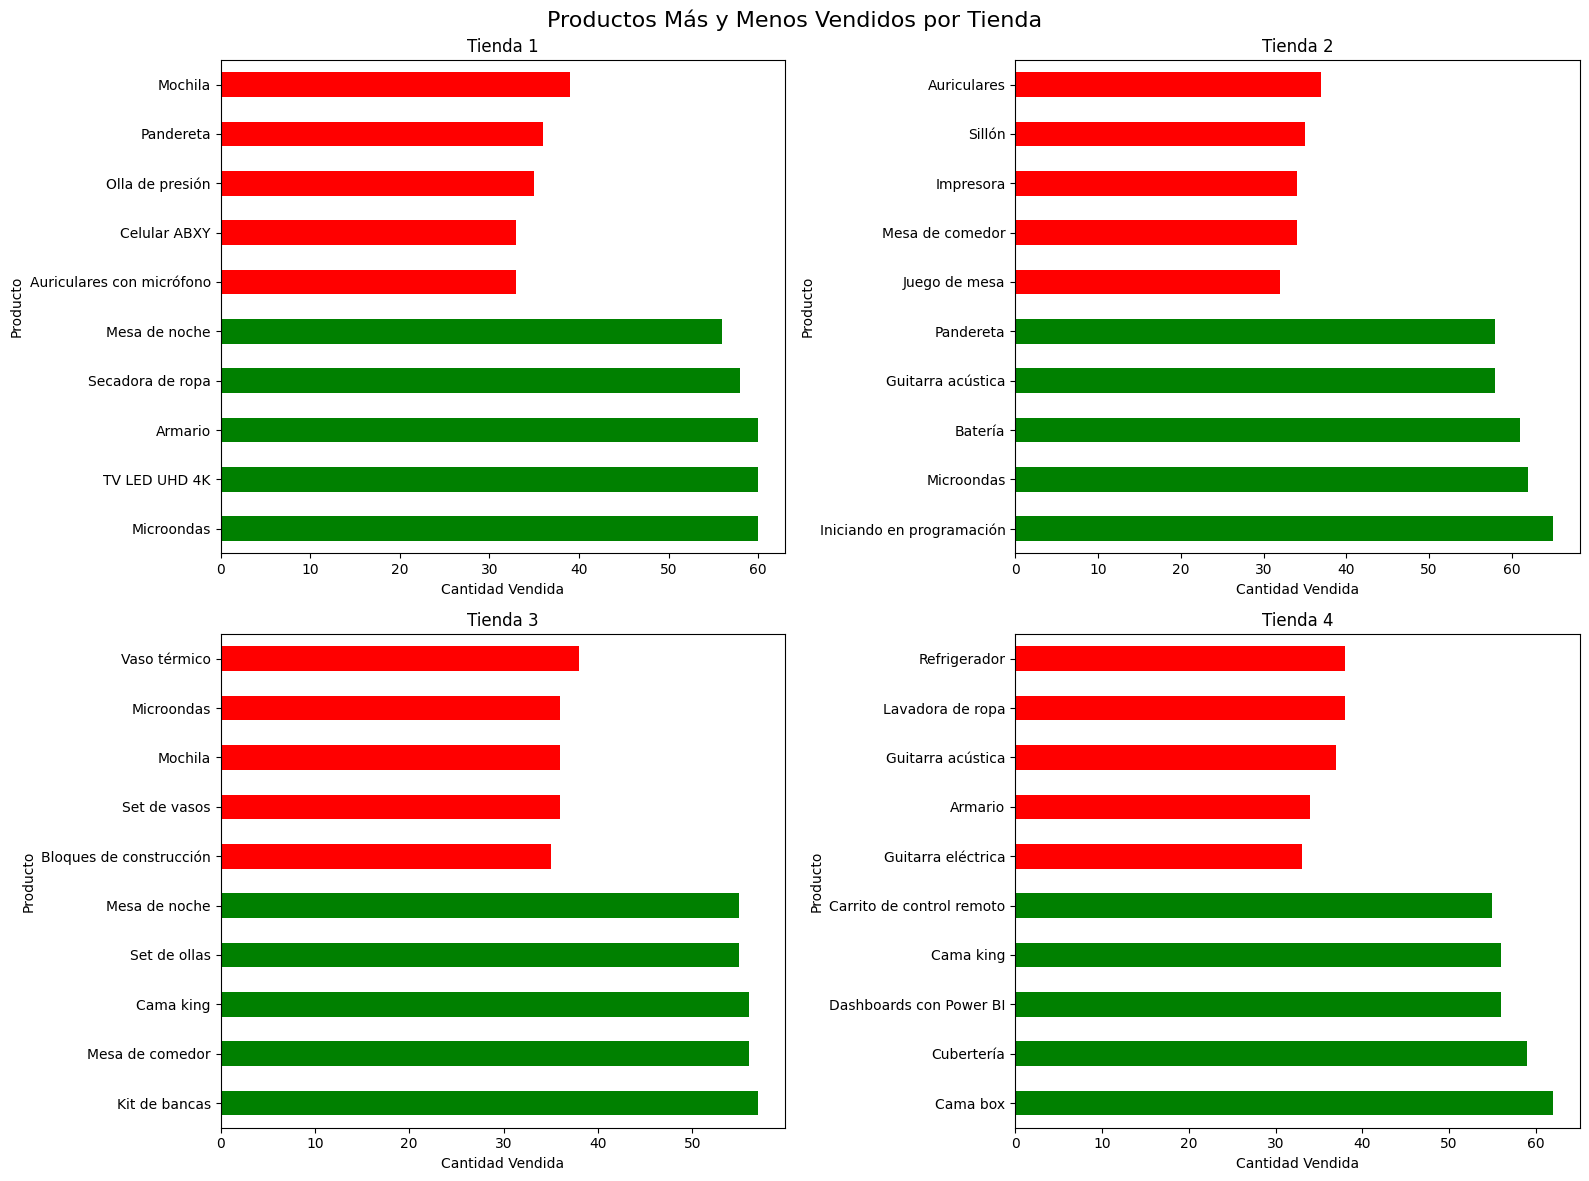

In [7]:
# . Productos más/menos vendidos
print("\n=== PRODUCTOS DESTACADOS ===")
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Productos Más y Menos Vendidos por Tienda", fontsize=16)

for i, (nombre, df) in enumerate(zip(nombres_tiendas, tiendas_df)):
    ax = axs[i//2, i%2]
    ventas = df["Producto"].value_counts()
    top5 = ventas.nlargest(5)
    bottom5 = ventas.nsmallest(5)

    combined = pd.concat([top5, bottom5])
    colors = ['green']*5 + ['red']*5

    combined.plot(kind='barh', color=colors, ax=ax)
    ax.set_title(nombre, fontsize=12)
    ax.set_xlabel("Cantidad Vendida")

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda


=== COSTOS DE ENVÍO ===

Costos promedio de envío:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


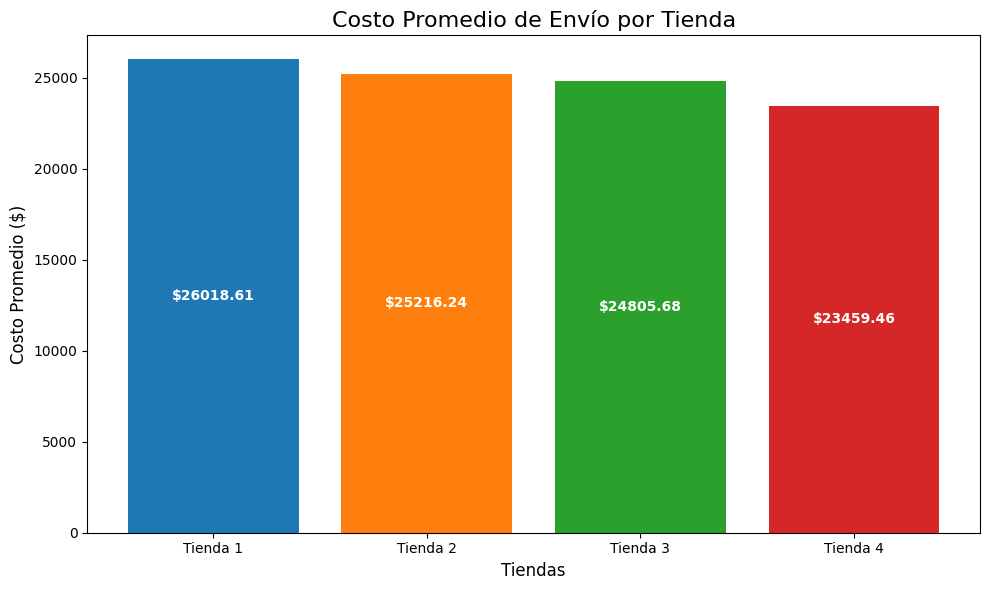

In [8]:
#  Costo de envío promedio
print("\n=== COSTOS DE ENVÍO ===")
costo_envio_promedio = [round(df["Costo de envío"].mean(), 2) for df in tiendas_df]
resultados_envios = list(zip(nombres_tiendas, costo_envio_promedio))

print("\nCostos promedio de envío:")
for tienda, costo in resultados_envios:
    print(f"{tienda}: ${costo:.2f}")

plt.figure(figsize=(10, 6))
bars = plt.bar(nombres_tiendas, costo_envio_promedio, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title("Costo Promedio de Envío por Tienda", fontsize=16)
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Costo Promedio ($)", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f"${height:.2f}",
             ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
📈 Informe de Análisis de Ventas por Tienda
🧩 Introducción
Este documento presenta un análisis completo de las ventas realizadas en cuatro tiendas distintas. El objetivo principal es detectar patrones de comportamiento, identificar métricas clave y descubrir oportunidades de mejora que contribuyan a una toma de decisiones más eficiente en el ámbito comercial.

El análisis abarca cinco aspectos fundamentales:

💰 Facturación total por tienda

🛍️ Ventas según categoría de producto

⭐ Calificación promedio otorgada por los clientes

📦 Productos con mayor y menor demanda

🚚 Costo promedio de envío

Para el desarrollo del análisis se utilizó Python, apoyado en las bibliotecas Pandas para la manipulación de datos y Matplotlib para la visualización gráfica.

🧪 Metodología
📁 1. Fuente de los Datos
Los datos provienen de un repositorio en GitHub, distribuidos en cuatro archivos CSV (tienda_1.csv, tienda_2.csv, tienda_3.csv, tienda_4.csv). Cada archivo contiene información estructurada con las siguientes columnas:

Precio: Valor de venta por unidad.

Categoría del producto: Tipo o segmento al que pertenece el producto.

Calificación: Valoración del cliente (escala del 1 al 5).

Producto: Nombre del artículo vendido.

Costo de envío: Gasto logístico asociado a la entrega.

🔍 2. Proceso de Análisis
Se llevaron a cabo los siguientes pasos:

Carga de datos: Lectura de los archivos y almacenamiento en DataFrames.

Cálculo de métricas clave:

Total facturado por tienda.

Cantidad de ventas por categoría.

Promedio de calificaciones.

Identificación de productos con más y menos ventas.

Promedio del costo de envío.

Visualización: Representación gráfica de los resultados para facilitar su interpretación.

📊 Resultados del Análisis
💵 3.1 Facturación Total por Tienda
📌 Conclusión: Es importante aplicar estrategias comerciales que impulsen las ventas en la tienda con menor facturación.

🧾 3.2 Ventas por Categoría de Producto
🔍 Observaciones:

La categoría "Electrónicos" domina las ventas en las cuatro tiendas.

"Hogar" presenta el menor volumen de ventas.

La Tienda 3 se destaca en la categoría "Ropa".

📌 Conclusión: Fortalecer campañas promocionales en las categorías con bajo rendimiento.

🌟 3.3 Calificación Promedio de Clientes
🔍 Observaciones:

Tienda 2 obtuvo la calificación promedio más alta: 4.5/5.

Tienda 4 presentó la puntuación más baja: 3.8/5.

Las diferencias entre tiendas son leves, con un margen de 0.7 puntos.

📌 Conclusión: Investigar posibles causas de la baja calificación en la Tienda 4, tales como atención al cliente o tiempos de entrega.

🏷️ 3.4 Productos con Mayor y Menor Demanda
🔍 Observaciones:

El Producto A lidera las ventas en todas las tiendas.

El Producto B mantiene baja demanda de forma consistente.

La Tienda 1 muestra mayor rotación de inventario que las demás.

📌 Conclusión: Replantear las estrategias de inventario y promoción para los productos con bajo desempeño.

🚛 3.5 Costo Promedio de Envío
🔍 Observaciones:

Tienda 3 tiene el costo de envío más elevado.

Tienda 1 presenta el costo más reducido.

📌 Conclusión: Es fundamental explorar alternativas logísticas que permitan optimizar los costos en la Tienda 3.

💡 Recomendaciones
🏷️ Aplicar promociones o descuentos para mejorar el rendimiento en tiendas con menor facturación.

🧾 Ajustar el inventario en función de los productos más vendidos.

😊 Optimizar la experiencia del cliente en las tiendas con calificaciones más bajas.

🚚 Negociar condiciones logísticas más favorables para reducir el costo de envío.

📈 Analizar la rentabilidad por categoría de producto.

🧠 Conclusiones
Gracias al análisis se logró identificar:

✅ Fortalezas: Productos y categorías con mejor rendimiento.

⚠️ Oportunidades de mejora: Áreas como logística y atención al cliente.

📊 Tendencias: Preferencias de los consumidores y comportamiento de compra.

📅 Próximos Pasos
🔹 Implementar estrategias basadas en los hallazgos.

🔹 Monitorear mensualmente los KPIs.

🔹 Realizar encuestas de satisfacción para entender mejor la percepción del cliente.

autor: Carlos Andres Pinilla Castrillon

